# Databases of Statistics Finland

Using databases of Statistics Finland, automatically updated link to a database serch result can be saved. For the databases, see https://statfin.stat.fi/PxWeb/pxweb/en/StatFin/.

In the following example a database search from the database "Price index of old dwellings in housing companies (2020=100) and numbers of transactions, monthly" is performed. The database is accessed at https://statfin.stat.fi/PxWeb/pxweb/en/StatFin/StatFin__ashi/statfin_ashi_pxt_13ms.px/. 

In the last stage of the database search (Show the table) an automatically updated link to the search results can be saved using the choice **Save your query**.

In [1]:
### Bring the libraries

import pandas as pd
import matplotlib.pyplot as plt

### Use the following style

plt.style.use('seaborn-whitegrid')

In [2]:
### Use the link you can copy after saving your query.

### In this query we omit the first thre rows  and use only columns [1, 2, 3, 4]

df = pd.read_csv('https://statfin.stat.fi:443/PxWeb/sq/fefc9029-9e16-456b-91ca-124333085037', encoding = 'cp1252')

### df.head()

### Rename the badly named column.

df.columns = ['Month', 'Greater Helsinki', 'Outside Greater Helsinki']

df.head()

,Month,Greater Helsinki,Outside Greater Helsinki
0,2020M01,4715,1911
1,2020M02,4684,1958
2,2020M03,4710,1954
3,2020M04,4869,1966
4,2020M05,4758,1948


In [3]:
### The most recent values marked by the asterisk are advanced information and may still change.

df['Month'].values

array(['2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09', '2020M10', '2020M11', '2020M12',
       '2021M01', '2021M02', '2021M03', '2021M04', '2021M05', '2021M06',
       '2021M07', '2021M08', '2021M09', '2021M10', '2021M11', '2021M12',
       '2022M01*', '2022M02*', '2022M03*', '2022M04*', '2022M05*',
       '2022M06*', '2022M07*', '2022M08*', '2022M09*', '2022M10*',
       '2022M11*', '2022M12*'], dtype=object)

In [4]:
### Remove rows with missing values.

df = df.dropna(subset = ['Month'])

### Remove asterisks from month labels

df['Month'] = df['Month'].astype(str).str.strip('*')

### Add time labels to the index. Note the format where the capital letter M is between the year Y and the month m.

df.index = pd.to_datetime(df['Month'], format = '%YM%m')

### Remove the obsolete column Month

df = df.drop('Month', axis = 1)

### Shorten column names for easier use.

df.tail()

,Greater Helsinki,Outside Greater Helsinki
Month,,
2022-08-01,5064,2089
2022-09-01,5112,2056
2022-10-01,4690,2018
2022-11-01,4865,1973
2022-12-01,4852,2023


Finally draw lines charts of prices in Greater Helsinki and Outside Greater Helsinki areas.

Text(0, 0.5, 'Outside Greater Helsinki area')

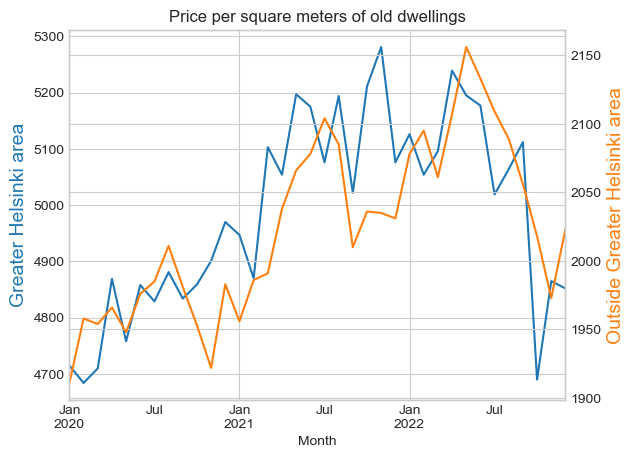

In [5]:
### First define object for Greater Helsinki

ax1 = df['Greater Helsinki'].plot(color = 'C0', title = 'Price per square meters of old dwellings')

plt.ylabel('Greater Helsinki area', color = 'C0', fontsize = 14)

### Then add another on top of this object

ax2 = ax1.twinx()

df['Outside Greater Helsinki'].plot(ax = ax2, color = 'C1')

plt.ylabel('Outside Greater Helsinki area', color = 'C1', fontsize = 14)

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>